   # Capstone Project    -   Marketing and Retail


## Problem Statement ###
=======================================================================================================================

OList an e-commerce companies have emerged and flourished in the industry. They offer the convenience to order from a wide variety of options from the comfort of one’s home. But how do they offer these “wide variety of options or products”? To be able to meet the demands of the customers, any e-commerce company would obviously need to store tons and tons of products in warehouses. Now, some of these warehoused products might be fast-moving products which sell very quickly and some others might be slow-moving. Each of the products being stored incurs a cost to the company in terms of space and maintenance. Since storing these products obviously add to the costs that the company incurs, it is absolutely necessary for the organisations to plan their inventory well.

Now, OList is one such e-commerce company that has faced some losses recently and they want to manage their inventory very well so as to reduce any unnecessary costs that they might be bearing. In this assignment, you have to manage the inventory cost of this e-commerce company OList. You need to identify top products that contribute to the revenue and also use market basket analysis to analyse the purchase behaviour of individual customers to estimate with relative certainty, what items are more likely to be purchased individually or in combination with some other products.

#### We should understand the below points for our Analysis:
*What should be the ideal category depth?  
Some product combinations are sold more than others.   
This needs to be understood using market basket analysis.  
After having specific categories in hand that will be beneficial to the company, how can you reduce the number of items in a particular category?*

In [117]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [118]:
# Importing the given Data set

orders = pd.read_excel("Retail_dataset.xlsx", sheet_name="orders")
order_items = pd.read_excel("Retail_dataset.xlsx", sheet_name="order_items")
customers = pd.read_excel("Retail_dataset.xlsx", sheet_name="customers")
payments = pd.read_excel("Retail_dataset.xlsx", sheet_name="payments")
products = pd.read_excel("Retail_dataset.xlsx", sheet_name="products")

orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [119]:
orders.shape

(99441, 7)

In [120]:
# As per given data Order_id is unique and customer_id is tied-up with multiple order_id's

orders.customer_id.value_counts().sort_values(ascending=False).head(10)

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
6469f99c1f9dfae7733b25662e7f1782     7
ca77025e7201e3b30c44b472ff346268     7
f0e310a6839dce9de1638e0fe5ab282a     6
63cfc61cee11cbe306bff5857d00bfe4     6
12f5d6e1cbf93dafd9dcc19095df0b3d     6
dc813062e0fc23409cd255f7f53c7074     6
47c1a3033b8b77b3ab6e109eb4d5fdf3     6
Name: customer_id, dtype: int64

In [121]:
# Total count of order_status

orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [122]:
#checking for the percentage data frequency on order_status

orders.order_status.value_counts(normalize=True)*100

delivered      97.020344
shipped         1.113223
canceled        0.628513
unavailable     0.612423
invoiced        0.315765
processing      0.302692
created         0.005028
approved        0.002011
Name: order_status, dtype: float64

In [123]:
# check for null values

orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_timestamp        2965
order_estimated_delivery_date       0
dtype: int64

In [124]:
# As we got the instructions to pick orders with "delivered" status, let's modify the given data accordingly

orders = orders[orders.order_status == "delivered"]
orders.shape

(96478, 7)

In [125]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [126]:
# Checking missing value

orders.isna().sum().sort_values(ascending=False)

order_approved_at                14
order_delivered_timestamp         8
order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_estimated_delivery_date     0
dtype: int64

### Missing Value Treatment 

In [127]:
# Taking median of differences between order_approved_at and order_purchased and then filled the NAN values with sum of order_purchased and diff

diff = (orders['order_approved_at'] - orders['order_purchase_timestamp']).median()
orders['order_approved_at'].fillna(orders['order_purchase_timestamp'] + diff,inplace=True)


# Taking median of differences between order_delivered_carrier_date and order_approved_at and then filled the NAN values with sum of order_approved_at and diff

diff = (orders['order_delivered_timestamp'] - orders['order_approved_at']).median()
orders['order_delivered_timestamp'].fillna(orders['order_approved_at'] + diff,inplace=True)

In [128]:
# Again checking the missing value after imputing the values

orders.isna().sum().sort_values(ascending=False)

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
dtype: int64

In [129]:
# Checking duplicate values

orders.duplicated().sum()

0

### Cleaning 'order_items' sheet

In [130]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [131]:
order_items.shape

(112650, 6)

In [132]:
order_items.isna().sum()

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

### Cleaning 'customers' sheet

In [133]:
customers.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [134]:
customers.shape

(99441, 4)

In [135]:
customers.isna().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [136]:
customers.customer_id.duplicated().sum()

3345

In [137]:
customers[customers.customer_id.duplicated()]

,customer_id,customer_zip_code_prefix,customer_city,customer_state
679,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP
1463,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ
1607,b8b3c435a58aebd788a477bed8342910,95585,arroio do sal,RS
2811,66980c3775537536f77b434d74e520f5,30290,belo horizonte,MG
3198,788313d21c3507fe890921f6e17aa679,11070,santos,SP
...,...,...,...,...
99324,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG
99327,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG
99336,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP
99353,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES


In [138]:
customers[customers.customer_id.duplicated()].shape

(3345, 4)

In [139]:
customers.shape

(99441, 4)

In [140]:
99441 - 3345

96096

In [141]:
customers.drop_duplicates(subset="customer_id", keep="first")

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [142]:
customers.drop_duplicates(subset="customer_id", keep="first").shape

(96096, 4)

In [143]:
customers.drop_duplicates(subset="customer_id", keep="first", inplace=True)

In [144]:
customers.shape

(96096, 4)

In [145]:
customers.customer_id.duplicated().sum()

0

### Cleaning 'payments' sheet

In [146]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [147]:
payments.shape

(103886, 5)

In [148]:
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

### Cleaning 'products' sheet

In [149]:
products.shape

(32951, 6)

In [150]:
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [151]:
products.isna().sum().sort_values(ascending=False)

product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
product_id                 0
dtype: int64

In [152]:
products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32781 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.3+ MB


In [153]:
products.product_category_name.value_counts()

toys                                 24725
bed_bath_table                         789
sports_leisure                         721
furniture_decor                        687
health_beauty                          648
                                     ...  
fashion_childrens_clothes                1
furniture_mattress_and_upholstery        1
home_comfort_2                           1
diapers_and_hygiene                      1
security_and_services                    1
Name: product_category_name, Length: 70, dtype: int64

In [154]:
products.product_category_name.value_counts(normalize=True)*100

toys                                 75.424789
bed_bath_table                        2.406882
sports_leisure                        2.199445
furniture_decor                       2.095726
health_beauty                         1.976755
                                       ...    
fashion_childrens_clothes             0.003051
furniture_mattress_and_upholstery     0.003051
home_comfort_2                        0.003051
diapers_and_hygiene                   0.003051
security_and_services                 0.003051
Name: product_category_name, Length: 70, dtype: float64

In [155]:
products.product_category_name.mode()[0]

'toys'

### Missing Value treatment with mode i.e.'Toys' as it is the most occuring product category.

In [156]:
products.product_category_name.fillna(products.product_category_name.mode()[0], inplace=True)

In [157]:
products.isna().sum().sort_values(ascending=False)

product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
product_id               0
product_category_name    0
dtype: int64

In [158]:
products.isna().sum()

product_id               0
product_category_name    0
product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
dtype: int64

In [159]:
products.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000
mean,2276.472488,30.815078,16.937661,23.196728
std,4282.038731,16.914458,13.637554,12.079047
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


In [160]:
num_cols = products.describe().columns.to_list()
num_cols

['product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm']

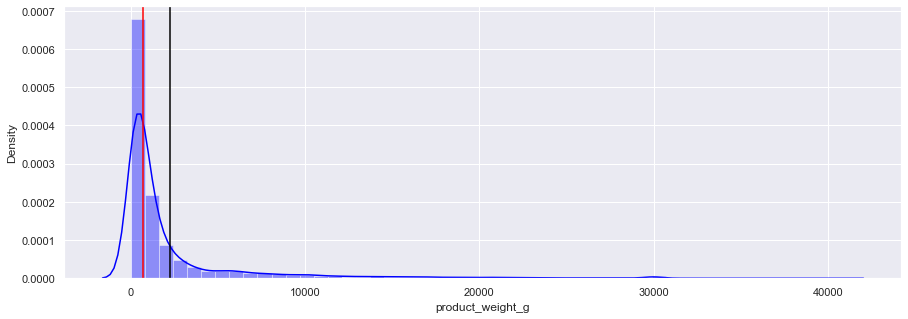

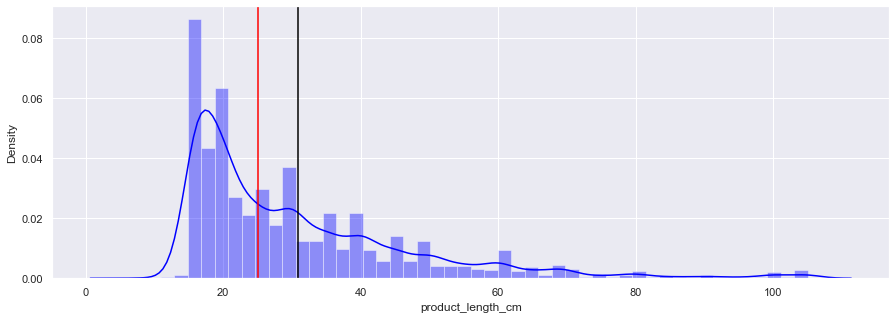

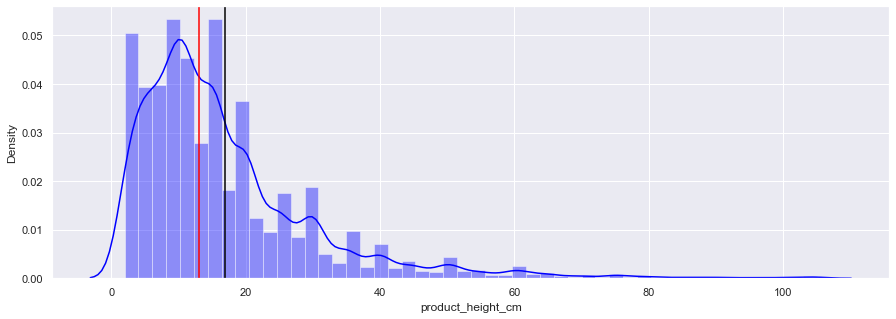

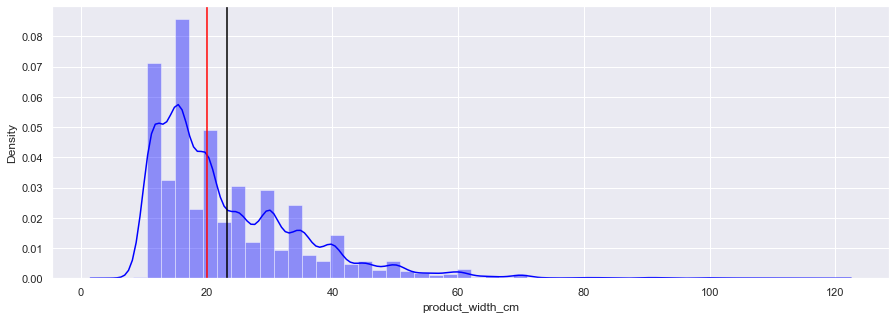

In [161]:
for i in num_cols:
    plt.figure(figsize=(15,5))
    sns.distplot(products[i] , color='blue')
    plt.axvline(products[i].mean(), color="black")
    plt.axvline(products[i].median(), color="red")
    plt.show()
    print("="*120)


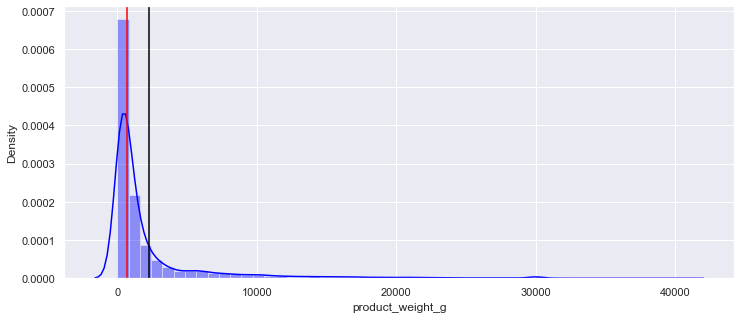

In [162]:
plt.figure(figsize=(12,5))
sns.distplot(products.product_weight_g , color= "blue")
plt.axvline(products.product_weight_g.mean(), color="black")
plt.axvline(products.product_weight_g.median(), color="red")
plt.show()

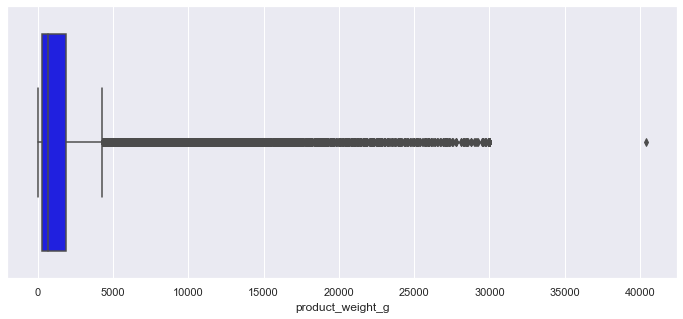

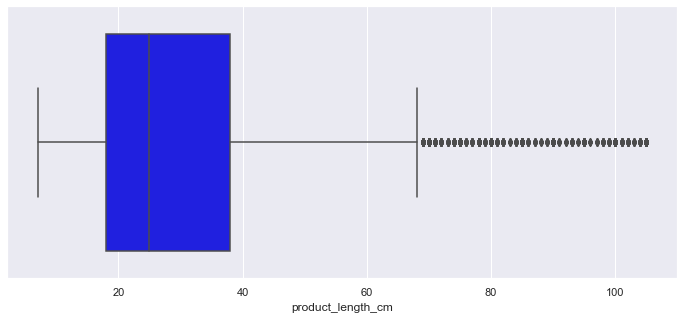

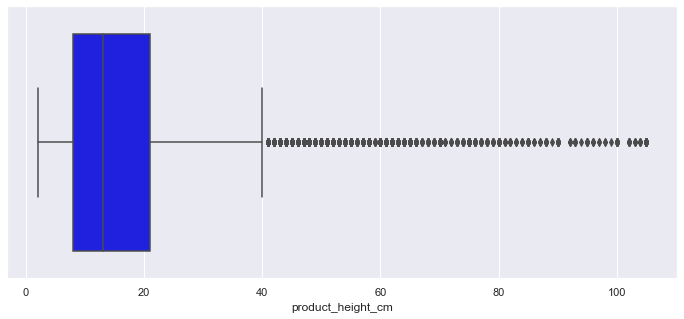

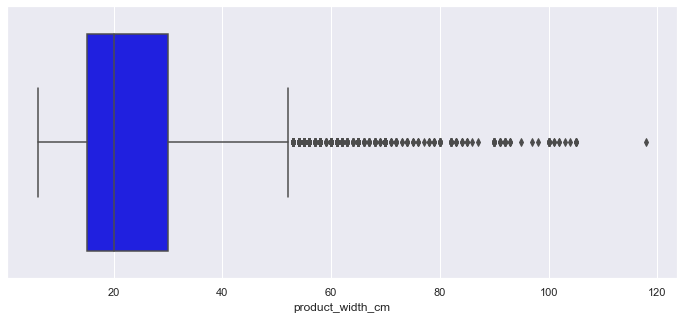

In [163]:
for i in num_cols:
    plt.figure(figsize=(12,5))
    sns.boxplot(products[i], color='blue')
    plt.show()
    print("="*120)

In [164]:
# Doing treatment of missing values by Median

for i in num_cols:
    products[i].fillna(products[i].median(), inplace=True)

In [165]:
# Checking for null values

products.isna().sum().sort_values(ascending=False)

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

### Exporting the dataset after Normalizing 

In [166]:
# Create a Pandas Excel writer using XlsxWriter as the engine

writer = pd.ExcelWriter('New_Retail_dataset.xlsx', engine='xlsxwriter')

In [167]:
# Write each dataframe to a different worksheet.

orders.to_excel(writer, sheet_name='orders')
order_items.to_excel(writer, sheet_name='order_items')
customers.to_excel(writer, sheet_name='customers')
products.to_excel(writer, sheet_name='products')
payments.to_excel(writer, sheet_name='payments')

In [168]:
# Close the Pandas Excel writer and output the Excel file.

writer.save()

### Merging DataFrames

In [169]:
ord_prod =pd.merge(order_items, products, on="product_id", how="inner")
ord_prod.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,toys,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,toys,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,toys,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,14.0


In [170]:
cust_ord =pd.merge(orders, customers, on="customer_id", how="inner")
cust_ord.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP
1,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-05 19:20:20,2017-09-15,3149,sao paulo,SP
2,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,47813,barreiras,BA
3,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,75265,vianopolis,GO
4,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,59296,sao goncalo do amarante,RN


In [171]:
ord_pay = pd.merge(cust_ord, payments, on="order_id", how="inner")
ord_pay.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,2,voucher,1,18.59
3,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-05 19:20:20,2017-09-15,3149,sao paulo,SP,1,credit_card,1,44.11
4,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,47813,barreiras,BA,1,wallet,1,141.46


In [172]:
ord_final = pd.merge(ord_pay, ord_prod, on="order_id", how="inner")
ord_final.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,...,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,500.0,19.0,8.0,13.0
3,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-05 19:20:20,2017-09-15,3149,sao paulo,SP,...,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,35.39,8.72,baby,350.0,19.0,14.0,12.0
4,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,47813,barreiras,BA,...,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,toys,400.0,19.0,13.0,19.0


In [173]:
# Checking final dataset 

ord_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115035 entries, 0 to 115034
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115035 non-null  object        
 1   customer_id                    115035 non-null  object        
 2   order_status                   115035 non-null  object        
 3   order_purchase_timestamp       115035 non-null  datetime64[ns]
 4   order_approved_at              115035 non-null  datetime64[ns]
 5   order_delivered_timestamp      115035 non-null  datetime64[ns]
 6   order_estimated_delivery_date  115035 non-null  datetime64[ns]
 7   customer_zip_code_prefix       115035 non-null  int64         
 8   customer_city                  115035 non-null  object        
 9   customer_state                 115035 non-null  object        
 10  payment_sequential             115035 non-null  int64         
 11  

In [174]:
ord_final.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64

In [175]:
# Most number of product delivered

ord_final.product_category_name.value_counts().nlargest(10)

toys                     86777
health_beauty             3047
bed_bath_table            2690
sports_leisure            2332
computers_accessories     2209
furniture_decor           2193
housewares                1718
watches_gifts             1555
telephony                 1229
auto                      1076
Name: product_category_name, dtype: int64

toys                               86777
health_beauty                       3047
bed_bath_table                      2690
sports_leisure                      2332
computers_accessories               2209
furniture_decor                     2193
housewares                          1718
watches_gifts                       1555
telephony                           1229
auto                                1076
garden_tools                        1070
cool_stuff                          1020
perfumery                            856
baby                                 788
electronics                          722
office_furniture                     702
stationery                           638
pet_shop                             513
fashion_bags_accessories             445
construction_tools_construction      254
Name: product_category_name, dtype: int64

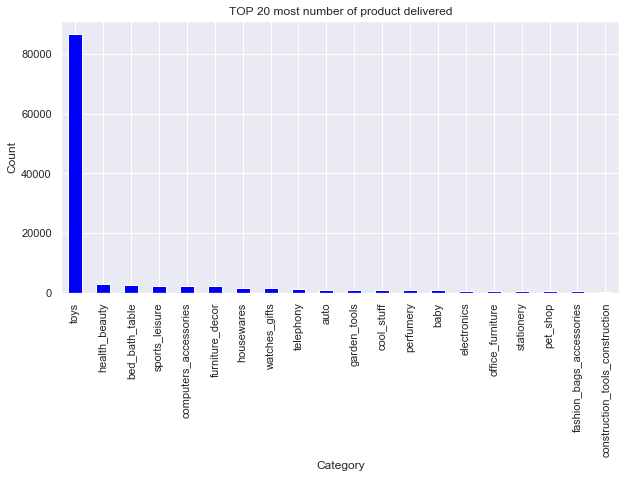

In [176]:
%matplotlib inline 
sns.set(color_codes=True)

top_delivery=ord_final.product_category_name.value_counts().nlargest(20)

# Checking most ordered product

ord_final.product_category_name.value_counts().nlargest(20).plot(kind='bar', figsize=(10,5), color= 'blue')
plt.title("TOP 20 most number of product delivered")
plt.ylabel('Count')
plt.xlabel('Category');
top_delivery

#### The most frequent purchases from a product category are in the following order:

1. Toys
2. Health and Beauty
3. Bed Bath Table
4. Sports and Leisure
5. Computer Accessories

In [177]:
# most number of product ordered vs revenue

prod_rev=ord_final.groupby(by=["product_category_name"])["price"].sum()

0                      toys
1             health_beauty
2             watches_gifts
3            sports_leisure
4     computers_accessories
5            bed_bath_table
6                cool_stuff
7           furniture_decor
8                housewares
9                      auto
10         office_furniture
11             garden_tools
12                     baby
13                perfumery
14                telephony
15                 pet_shop
16               stationery
17                computers
18         small_appliances
19        home_appliances_2
Name: product_category_name, dtype: object

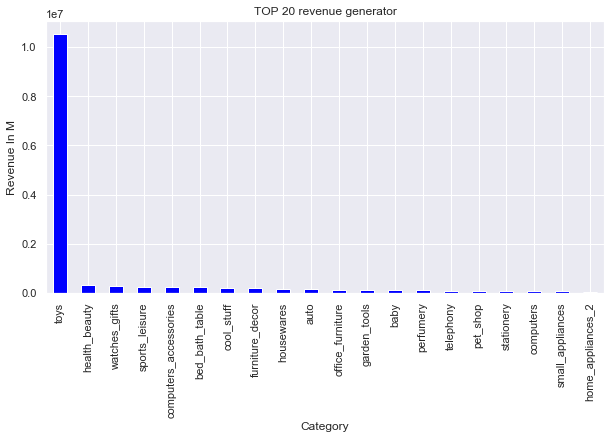

In [178]:
# Top 20 revenue genrating products

top_revenue=pd.DataFrame(prod_rev.nlargest(20)).reset_index()
prod_rev.nlargest(20).plot(kind='bar', figsize=(10,5), color='blue')
plt.title("TOP 20 revenue generator")
plt.ylabel('Revenue In M')
plt.xlabel('Category');

top_revenue.product_category_name


#### Toys, Health and beauty, Watches and gift make up more than 80% of all revenue

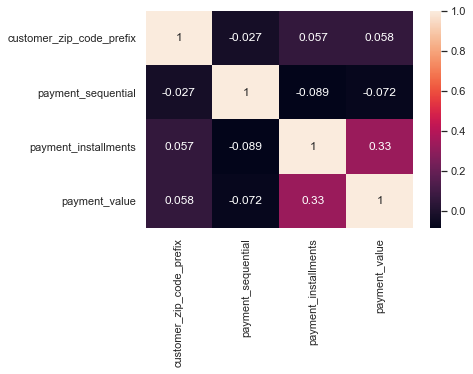

In [179]:
# Analysing Multivariate

sns.heatmap(ord_pay.corr(),annot=True)
plt.show()

### RFM Modelling:
We need to create 3 freatures from the data:

* Recency: Latest date- last purchase date  
* Frequency: Total no. of transactions made by a single customer (count of order id)  
* Monetary: Total value of transacted sales by each customer.

### Calculating Recency

In [180]:
#finding the last date on which a customer made purchase

recency=pd.DataFrame(ord_final.groupby('product_id')['order_purchase_timestamp'].max().reset_index())

In [181]:
recency['order_purchase_timestamp'].max()

Timestamp('2018-08-29 15:00:37')

In [182]:
# Calculating recency using maximum date of purchase made by a customer as the date to calculate the recency of purchases

recency['recent_days']=(recency['order_purchase_timestamp'].max()-recency['order_purchase_timestamp']).dt.days
recency

,product_id,order_purchase_timestamp,recent_days
0,00066f42aeeb9f3007548bb9d3f33c38,2018-05-20 18:45:21,100
1,00088930e925c41fd95ebfe695fd2655,2017-12-12 19:20:28,259
2,0009406fd7479715e4bef61dd91f2462,2017-12-21 16:21:47,250
3,000b8f95fcb9e0096488278317764d19,2018-08-10 13:24:35,19
4,000d9be29b5207b54e86aa1b1ac54872,2018-04-03 09:24:12,148
...,...,...,...
32211,fff6177642830a9a94a0f2cba5e476d1,2017-09-03 11:38:54,360
32212,fff81cc3158d2725c0655ab9ba0f712c,2018-07-30 09:18:59,30
32213,fff9553ac224cec9d15d49f5a263411f,2017-10-06 16:44:05,326
32214,fffdb2d0ec8d6a61f0a0a0db3f25b441,2018-08-10 17:15:07,18


### Calculating Frequency

We will count the number of unique orders made by each customer to obtain their purchase frequencies

In [183]:
frequency=pd.DataFrame(ord_final.groupby('product_id')['customer_id'].count().reset_index())
frequency

,product_id,customer_id
0,00066f42aeeb9f3007548bb9d3f33c38,1
1,00088930e925c41fd95ebfe695fd2655,1
2,0009406fd7479715e4bef61dd91f2462,1
3,000b8f95fcb9e0096488278317764d19,2
4,000d9be29b5207b54e86aa1b1ac54872,1
...,...,...
32211,fff6177642830a9a94a0f2cba5e476d1,2
32212,fff81cc3158d2725c0655ab9ba0f712c,1
32213,fff9553ac224cec9d15d49f5a263411f,1
32214,fffdb2d0ec8d6a61f0a0a0db3f25b441,5


### Calculating Monetary

In [184]:
monetary=pd.DataFrame(ord_final[['product_id','payment_value']].groupby('product_id')['payment_value'].sum().reset_index())
monetary

,product_id,payment_value
0,00066f42aeeb9f3007548bb9d3f33c38,120.24
1,00088930e925c41fd95ebfe695fd2655,143.83
2,0009406fd7479715e4bef61dd91f2462,242.10
3,000b8f95fcb9e0096488278317764d19,157.00
4,000d9be29b5207b54e86aa1b1ac54872,218.27
...,...,...
32211,fff6177642830a9a94a0f2cba5e476d1,285.39
32212,fff81cc3158d2725c0655ab9ba0f712c,97.89
32213,fff9553ac224cec9d15d49f5a263411f,43.85
32214,fffdb2d0ec8d6a61f0a0a0db3f25b441,228.82


In [185]:
# Merge recency,frequency and monetary dataframe

df_rfm=pd.merge(recency,frequency,on='product_id')
df_rfm=pd.merge(df_rfm,monetary,on='product_id')
df_rfm

,product_id,order_purchase_timestamp,recent_days,customer_id,payment_value
0,00066f42aeeb9f3007548bb9d3f33c38,2018-05-20 18:45:21,100,1,120.24
1,00088930e925c41fd95ebfe695fd2655,2017-12-12 19:20:28,259,1,143.83
2,0009406fd7479715e4bef61dd91f2462,2017-12-21 16:21:47,250,1,242.10
3,000b8f95fcb9e0096488278317764d19,2018-08-10 13:24:35,19,2,157.00
4,000d9be29b5207b54e86aa1b1ac54872,2018-04-03 09:24:12,148,1,218.27
...,...,...,...,...,...
32211,fff6177642830a9a94a0f2cba5e476d1,2017-09-03 11:38:54,360,2,285.39
32212,fff81cc3158d2725c0655ab9ba0f712c,2018-07-30 09:18:59,30,1,97.89
32213,fff9553ac224cec9d15d49f5a263411f,2017-10-06 16:44:05,326,1,43.85
32214,fffdb2d0ec8d6a61f0a0a0db3f25b441,2018-08-10 17:15:07,18,5,228.82


In [186]:
# Dropping unneccesary column

df_rfm.drop(['order_purchase_timestamp'],axis=1,inplace=True)
df_rfm

,product_id,recent_days,customer_id,payment_value
0,00066f42aeeb9f3007548bb9d3f33c38,100,1,120.24
1,00088930e925c41fd95ebfe695fd2655,259,1,143.83
2,0009406fd7479715e4bef61dd91f2462,250,1,242.10
3,000b8f95fcb9e0096488278317764d19,19,2,157.00
4,000d9be29b5207b54e86aa1b1ac54872,148,1,218.27
...,...,...,...,...
32211,fff6177642830a9a94a0f2cba5e476d1,360,2,285.39
32212,fff81cc3158d2725c0655ab9ba0f712c,30,1,97.89
32213,fff9553ac224cec9d15d49f5a263411f,326,1,43.85
32214,fffdb2d0ec8d6a61f0a0a0db3f25b441,18,5,228.82


In [187]:
# Recency = Days from last purchase
# Frequency = Number of purchase made
# Monetary = total amount purchased by a customer

df_rfm.columns=['product_id','Recency','Frequency','Monetary']
df_rfm.reset_index()
df_rfm.set_index("product_id",inplace=True)

In [188]:
df_rfm

,Recency,Frequency,Monetary
product_id,,,
00066f42aeeb9f3007548bb9d3f33c38,100,1,120.24
00088930e925c41fd95ebfe695fd2655,259,1,143.83
0009406fd7479715e4bef61dd91f2462,250,1,242.10
000b8f95fcb9e0096488278317764d19,19,2,157.00
000d9be29b5207b54e86aa1b1ac54872,148,1,218.27
...,...,...,...
fff6177642830a9a94a0f2cba5e476d1,360,2,285.39
fff81cc3158d2725c0655ab9ba0f712c,30,1,97.89
fff9553ac224cec9d15d49f5a263411f,326,1,43.85


In [189]:
# Descriptive stats for the RFM analysis

df_rfm.describe()

,Recency,Frequency,Monetary
count,32216.000000,32216.000000,32216.000000
mean,205.558884,3.570741,613.861449
std,159.211091,10.971294,2163.471674
min,0.000000,1.000000,9.590000
25%,67.000000,1.000000,91.787500
50%,174.000000,1.000000,198.260000
75%,312.000000,3.000000,477.425000
max,695.000000,529.000000,109312.640000


In [190]:
df_rfm_log = df_rfm.copy()
print(df_rfm_log.describe())

            Recency     Frequency       Monetary
count  32216.000000  32216.000000   32216.000000
mean     205.558884      3.570741     613.861449
std      159.211091     10.971294    2163.471674
min        0.000000      1.000000       9.590000
25%       67.000000      1.000000      91.787500
50%      174.000000      1.000000     198.260000
75%      312.000000      3.000000     477.425000
max      695.000000    529.000000  109312.640000


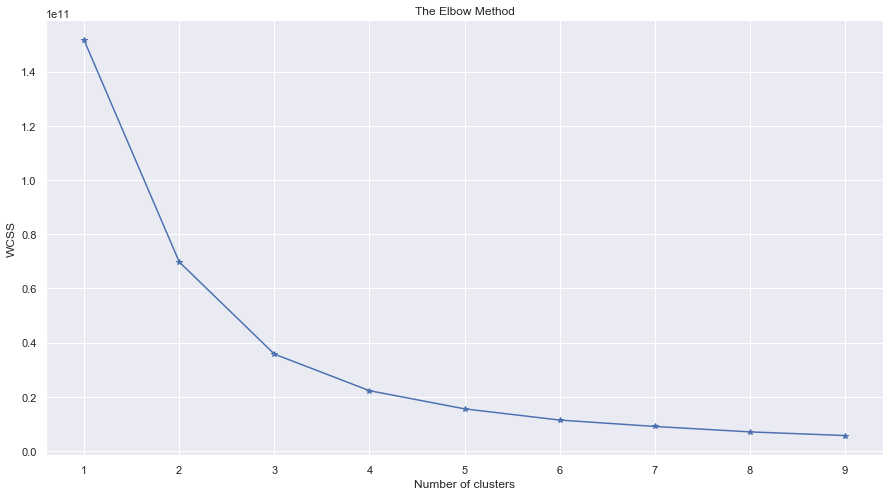

In [191]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_rfm_log)
    wcss.append(kmeans.inertia_)

f, ax = plt.subplots(figsize=(15, 8))  
plt.style.use('_classic_test_patch')  
plt.plot(range(1, 10), wcss, '-*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS');

#### Observation:
We can see there is a sharp turn from the 4 point. We can select values between 4 to 6 for our clusters.

Lets plot all the clusters 4, 5 & 6 to see which is defined better.

In [192]:
(df_rfm[df_rfm["Frequency"]>1].shape[0]/32216)*100

47.04805065805811

### From this above calculation we can say that around 47% customers are one time customers and only 53% are recurring customers.

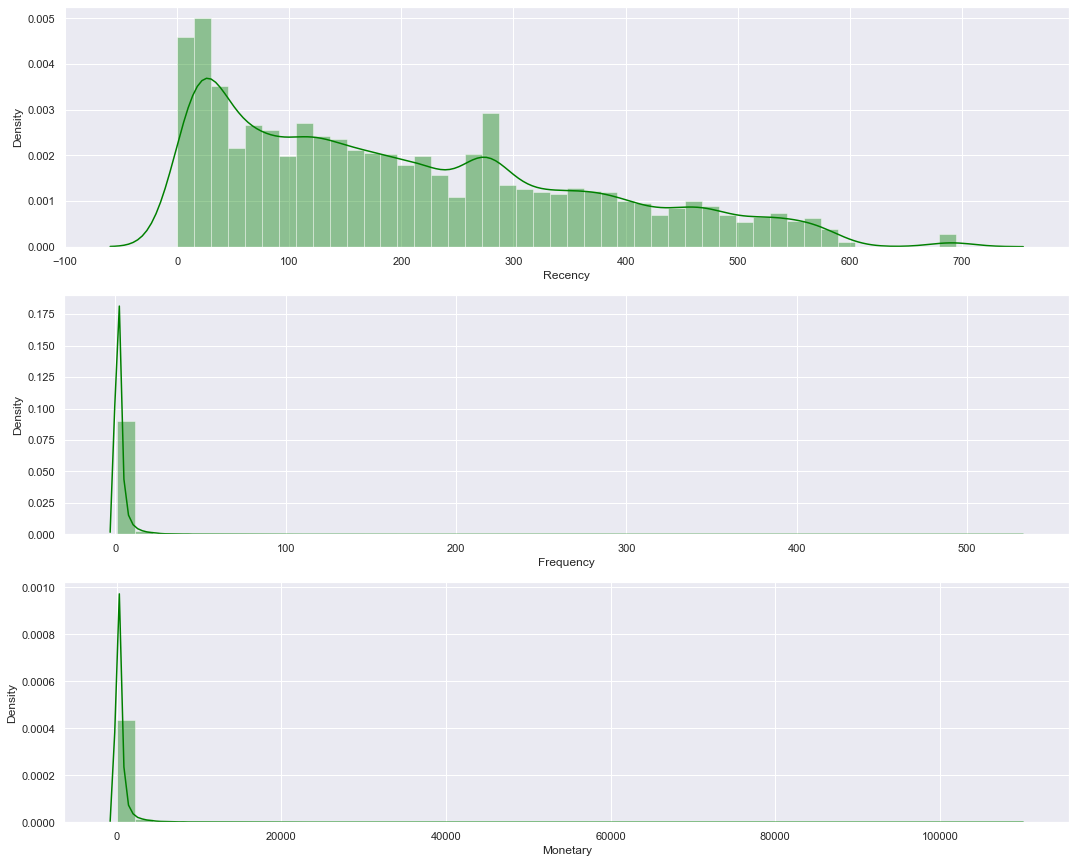

In [193]:
#plot RFM distribution
plt.figure(figsize=(18,15))

#plot distribution of Recency
plt.subplot(3,1,1);
sns.distplot(df_rfm["Recency"], color= 'green')

#plot distribution of Frequency
plt.subplot(3,1,2);
sns.distplot(df_rfm["Frequency"] , color= 'green')

#plot distribution of Monetary
plt.subplot(3,1,3);
sns.distplot(df_rfm["Monetary"], color='green')
plt.show()

In [194]:
kmeans = KMeans(n_clusters=4, random_state=1) 
kmeans.fit(df_rfm_log)
cluster_labels = kmeans.labels_
data_rfm_k4 = df_rfm_log.assign(Cluster=cluster_labels)
grouped = data_rfm_k4.groupby(['Cluster'])
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
  }).round(1)

Recency Frequency Monetary       
           mean      mean     mean  count
Cluster                                  
0         209.1       2.5    342.9  30776
1          96.4      68.1  17297.7    144
2          82.8     226.3  58130.6     21
3         134.1      18.2   4322.3   1275

In [195]:
data_melt = pd.melt(
                    data_rfm_k4.reset_index(),               
                    id_vars=['product_id', 'Cluster'],
                    value_vars=['Recency', 'Frequency', 'Monetary'], 
                    var_name='Metric', value_name='Value'
                    )
data_melt.head(10)

,product_id,Cluster,Metric,Value
0,00066f42aeeb9f3007548bb9d3f33c38,0,Recency,100.0
1,00088930e925c41fd95ebfe695fd2655,0,Recency,259.0
2,0009406fd7479715e4bef61dd91f2462,0,Recency,250.0
3,000b8f95fcb9e0096488278317764d19,0,Recency,19.0
4,000d9be29b5207b54e86aa1b1ac54872,0,Recency,148.0
5,0011c512eb256aa0dbbb544d8dffcf6e,0,Recency,257.0
6,00126f27c813603687e6ce486d909d01,0,Recency,345.0
7,001795ec6f1b187d37335e1c4704762e,0,Recency,245.0
8,001b237c0e9bb435f2e54071129237e9,0,Recency,20.0
9,001b72dfd63e9833e8c02742adf472e3,0,Recency,259.0


### RFM Quartiles

* The simples way to create product segments from RFM model is to use quartiles.
* We assign score from 1 to 4 to Recency,Frequency and Monetary.  
* 4 is the best/heighest value, and 1 is the lowest/worst value.  
* RFM score is calculated simply by combining individual RFM score numbers.

In [196]:
quantiles=df_rfm.quantile(q=[0.25,0.5,0.75])
quantiles.to_dict()


{'Recency': {0.25: 67.0, 0.5: 174.0, 0.75: 312.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 3.0},
 'Monetary': {0.25: 91.7875, 0.5: 198.26, 0.75: 477.42500000000007}}

In [197]:
#x=value, p=recency,frequency, monetary_value,  d=quartiles dict
def RScore(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<= d[p][0.50]:
        return 3
    elif x<= d[p][0.75]:
        return 2
    else:
        return 1

# x=value, p=recency,frequency, monetary_value,  k=quartiles dict
def FMScore(x,p,k):
    if x<=k[p][0.25]:
        return 1
    elif x<=k[p][0.50]:
        return 2
    elif x<=k[p][0.75]:
        return 3
    else:
        return 4

In [198]:
#create RFM segmentation table

rfm_segmentation=df_rfm
rfm_segmentation['R_Quartile']=rfm_segmentation["Recency"].apply(RScore,args=('Recency',quantiles))
rfm_segmentation['F_Quartile']=rfm_segmentation["Frequency"].apply(FMScore,args=('Frequency',quantiles))
rfm_segmentation['M_Quartile']=rfm_segmentation["Monetary"].apply(FMScore,args=('Monetary',quantiles))

In [199]:
rfm_segmentation

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
product_id,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,100,1,120.24,3,1,2
00088930e925c41fd95ebfe695fd2655,259,1,143.83,2,1,2
0009406fd7479715e4bef61dd91f2462,250,1,242.10,2,1,3
000b8f95fcb9e0096488278317764d19,19,2,157.00,4,3,2
000d9be29b5207b54e86aa1b1ac54872,148,1,218.27,3,1,3
...,...,...,...,...,...,...
fff6177642830a9a94a0f2cba5e476d1,360,2,285.39,1,3,3
fff81cc3158d2725c0655ab9ba0f712c,30,1,97.89,4,1,2
fff9553ac224cec9d15d49f5a263411f,326,1,43.85,1,1,1


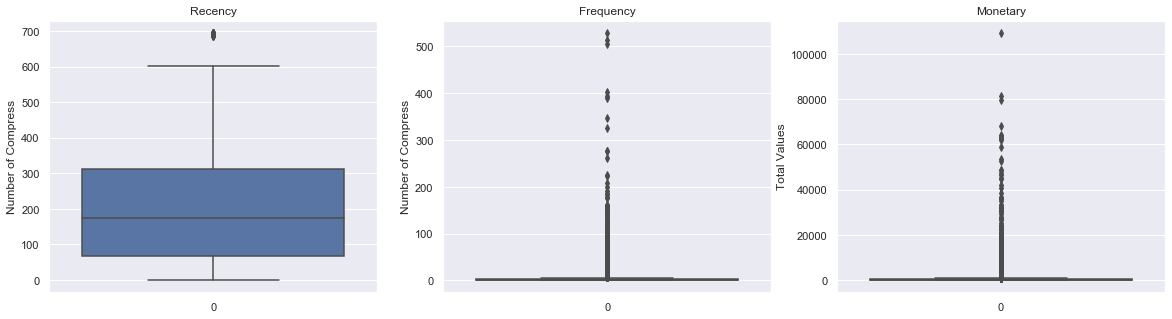

In [200]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(data=df_rfm['Recency'])
plt.title('Recency')
plt.ylabel('Number of Compress')
plt.subplot(1,3,2)
sns.boxplot(data=df_rfm['Frequency'])
plt.title('Frequency')
plt.ylabel('Number of Compress')
plt.subplot(1,3,3)
sns.boxplot(data=df_rfm['Monetary'])
plt.title('Monetary')
plt.ylabel('Total Values')
plt.show()

In [201]:
rfm_segmentation['RFMScore']=rfm_segmentation.R_Quartile.map(str)+rfm_segmentation.F_Quartile.map(str)+rfm_segmentation.M_Quartile.map(str)
rfm_segmentation

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
product_id,,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,100,1,120.24,3,1,2,312
00088930e925c41fd95ebfe695fd2655,259,1,143.83,2,1,2,212
0009406fd7479715e4bef61dd91f2462,250,1,242.10,2,1,3,213
000b8f95fcb9e0096488278317764d19,19,2,157.00,4,3,2,432
000d9be29b5207b54e86aa1b1ac54872,148,1,218.27,3,1,3,313
...,...,...,...,...,...,...,...
fff6177642830a9a94a0f2cba5e476d1,360,2,285.39,1,3,3,133
fff81cc3158d2725c0655ab9ba0f712c,30,1,97.89,4,1,2,412
fff9553ac224cec9d15d49f5a263411f,326,1,43.85,1,1,1,111


In [202]:
def segment(x):
    if x in ['444','443','433','442','434']:
        return 'Superhit Products'
    elif x in [ '432','341','342','332','333','344','343','441']:
        return 'Fast Moving Average Price Products '
    elif x in ['334', '234','214','224','413','314','244','243']:
        return 'Costly Products'
    elif x in ['212', '213', '222','211','114','311','312','214','143','142','141','241']:
        return 'Infrequent Products'
    elif x in ['111', '121','112','113','144']:
        return 'Hardly Any Sale Products'
    else:
        return 'Average Sale Products'

In [203]:
rfm_segmentation['segments'] = rfm_segmentation['RFMScore'].apply(segment)
rfm_segmentation['segments'].value_counts()

Average Sale Products                  7850
Infrequent Products                    7602
Hardly Any Sale Products               5398
Fast Moving Average Price Products     3880
Superhit Products                      3804
Costly Products                        3682
Name: segments, dtype: int64

In [204]:
segmentwise = rfm_segmentation.groupby('segments').agg(RecencyMean = ('Recency', 'mean'),
                                          FrequencyMean = ('Frequency', 'mean'),
                                          MonetaryMean = ('Monetary', 'mean'),
                                          GroupSize = ('Recency', 'size'))
segmentwise

,RecencyMean,FrequencyMean,MonetaryMean,GroupSize
segments,,,,
Average Sale Products,189.908535,1.694013,245.769522,7850
Costly Products,170.920424,4.002173,1089.040334,3682
Fast Moving Average Price Products,105.236082,6.373969,980.425448,3880
Hardly Any Sale Products,436.716191,1.874954,359.283874,5398
Infrequent Products,214.496974,1.190345,167.866961,7602
Superhit Products,27.828076,11.330179,1792.174934,3804


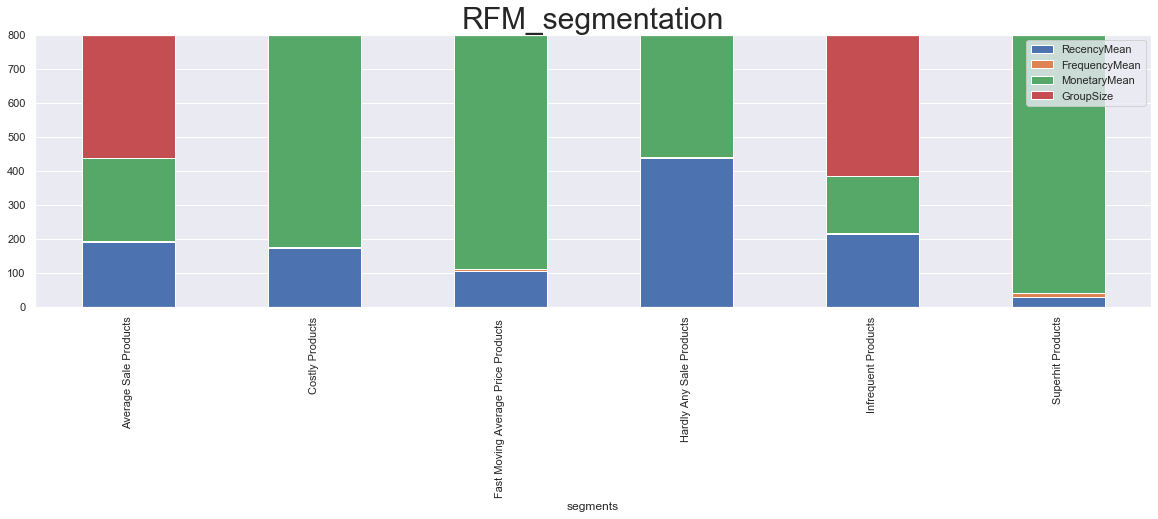

In [205]:
ax = segmentwise.plot.bar(stacked=True, figsize=(20,5))
ax.set_title('RFM_segmentation', fontsize=30)
ax.set_ylim(0,800)
plt.show()

In [206]:
rfm_segmentation

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,segments
product_id,,,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,100,1,120.24,3,1,2,312,Infrequent Products
00088930e925c41fd95ebfe695fd2655,259,1,143.83,2,1,2,212,Infrequent Products
0009406fd7479715e4bef61dd91f2462,250,1,242.10,2,1,3,213,Infrequent Products
000b8f95fcb9e0096488278317764d19,19,2,157.00,4,3,2,432,Fast Moving Average Price Products
000d9be29b5207b54e86aa1b1ac54872,148,1,218.27,3,1,3,313,Average Sale Products
...,...,...,...,...,...,...,...,...
fff6177642830a9a94a0f2cba5e476d1,360,2,285.39,1,3,3,133,Average Sale Products
fff81cc3158d2725c0655ab9ba0f712c,30,1,97.89,4,1,2,412,Average Sale Products
fff9553ac224cec9d15d49f5a263411f,326,1,43.85,1,1,1,111,Hardly Any Sale Products


In [207]:
y= rfm_segmentation.merge(products[['product_id','product_category_name']],on='product_id',how='left')

In [208]:
y = y.loc[:, ['product_category_name','segments']]

In [209]:
y

,product_category_name,segments
0,toys,Infrequent Products
1,auto,Infrequent Products
2,toys,Infrequent Products
3,housewares,Fast Moving Average Price Products
4,toys,Average Sale Products
...,...,...
32211,toys,Average Sale Products
32212,health_beauty,Average Sale Products
32213,toys,Hardly Any Sale Products
32214,toys,Superhit Products


In [210]:
pivot = pd.pivot_table(data=y, index=['product_category_name'], columns=['segments'], aggfunc=len,  fill_value=0)

In [211]:
pivot_sort=pivot.sort_values('Costly Products', ascending=False)

In [212]:
pivot_sort

segments,Average Sale Products,Costly Products,Fast Moving Average Price Products,Hardly Any Sale Products,Infrequent Products,Superhit Products
product_category_name,,,,,,
toys,5875,2779,2970,4128,5806,2793
furniture_decor,154,80,64,161,139,70
bed_bath_table,186,76,117,135,163,104
computers_accessories,94,74,49,52,89,53
sports_leisure,159,71,85,126,189,80
...,...,...,...,...,...,...
fashion_childrens_clothes,0,0,1,0,0,0
home_comfort_2,0,0,0,1,0,0
fashion_sport,1,0,0,2,0,0


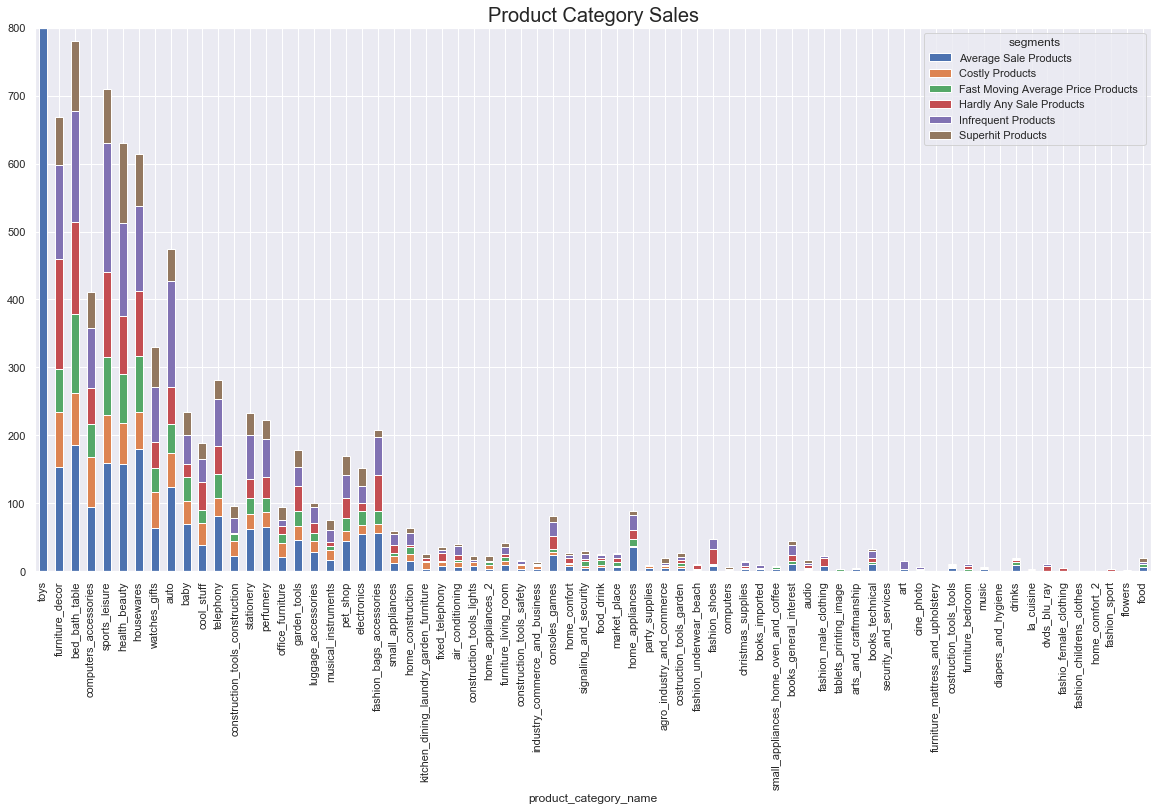

In [213]:
ax = pivot_sort.plot.bar(stacked=True, figsize=(20,10))
ax.set_title('Product Category Sales', fontsize=20)
ax.set_ylim(0,800)
plt.show()

### Observation

* It is observed that around 20 product categories account for 80% of Overall Sale  
* Close to 40-50 % of furniture decor , bed bath table, sports_leisure, fashion bags and accessories and auto have low frequency or hardly any sale products  
* Flowers, home comfort, fashion childrends clothing , furniture mattress and upholstry , security and services and many more have hardly any sale  

## Market Basket Analysis

In [214]:
len(order_items['order_id'].unique())

98666

In [215]:
order_items.shape

(112650, 6)

In [216]:
data = order_items.merge(products[['product_id','product_category_name']], on='product_id', how='inner')

In [217]:
data.shape

(112650, 7)

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               112650 non-null  object 
 1   order_item_id          112650 non-null  int64  
 2   product_id             112650 non-null  object 
 3   seller_id              112650 non-null  object 
 4   price                  112650 non-null  float64
 5   shipping_charges       112650 non-null  float64
 6   product_category_name  112650 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 5.2+ MB


In [219]:
# Creating a basket for the analysis 

Basket = (data.groupby(['order_id', 'product_category_name'])
          ['order_item_id'].sum().unstack().reset_index().fillna(0).set_index('order_id'))

In [220]:
Basket

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
00018f77f2f0320c557190d7a144bdd3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
000229ec398224ef6ca0657da4fc703e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
00024acbcdf0a6daa1e931b038114c75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
00042b26cf59d7ce69dfabb4e55b4fd9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fffcd46ef2263f404302a634eb57f7eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
fffce4705a9662cd70adb13d4a31832d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [221]:
# Converting the values to 0 or 1

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

Basket_encode = Basket.applymap(encode_units)
Basket_encode

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00018f77f2f0320c557190d7a144bdd3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
000229ec398224ef6ca0657da4fc703e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00024acbcdf0a6daa1e931b038114c75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00042b26cf59d7ce69dfabb4e55b4fd9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffcd46ef2263f404302a634eb57f7eb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
fffce4705a9662cd70adb13d4a31832d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [222]:
# Filter the Basket with the sum of values having >=2

Basket_encode_filter = Basket_encode[(Basket_encode > 0).sum(axis=1) >=2]
Basket_encode_filter

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00337fe25a3780b3424d9ad7c5a4b35e,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
00946f674d880be1f188abc10ad7cf46,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00bcee890eba57a9767c7b5ca12d3a1b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
01144cadcf64b6427f0a6580a3033220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
013a98b3a668bcef05b98898177f6923,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff632bc583a94f23c59db4cbaa0ba2ab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
ffa466d3e55f98477b7e0da764df3c6c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
ffb9a9cd00c74c11c24aa30b3d78e03b,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


### Mlxtend (machine learning extensions) is a Python library of useful tools for the day-to-day data science tasks

In [223]:
pip install mlxtend


In [224]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [225]:
frequent_itemsets = apriori(Basket_encode_filter, min_support=0.03, 
                            use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)
frequent_itemsets["Length"] = frequent_itemsets['itemsets'].apply(lambda x:len(x))

frequent_itemsets


,support,itemsets,Length
0,0.971604,(toys),1
1,0.229470,(bed_bath_table),1
2,0.225633,"(bed_bath_table, toys)",2
3,0.127398,(furniture_decor),1
4,0.119724,"(furniture_decor, toys)",2
5,0.083653,(computers_accessories),1
6,0.079816,"(computers_accessories, toys)",2
7,0.067536,(health_beauty),1
8,0.064467,"(health_beauty, toys)",2
9,0.057559,(watches_gifts),1


#### Setting Lift score to minimum 90% to find the best basket of two products

In [226]:
rules = association_rules(frequent_itemsets, metric='lift', 
                          min_threshold = 0.9).sort_values('lift', ascending=False).reset_index(drop=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bed_bath_table),(toys),0.229470,0.971604,0.225633,0.983278,1.012015,0.002679,1.698081
1,(toys),(bed_bath_table),0.971604,0.229470,0.225633,0.232227,1.012015,0.002679,1.003591
2,(fashion_bags_accessories),(toys),0.033001,0.971604,0.032233,0.976744,1.005290,0.000170,1.221028
3,(toys),(fashion_bags_accessories),0.971604,0.033001,0.032233,0.033175,1.005290,0.000170,1.000181
4,(auto),(toys),0.031466,0.971604,0.030698,0.975610,1.004123,0.000126,1.164236
5,(toys),(auto),0.971604,0.031466,0.030698,0.031596,1.004123,0.000126,1.000134
6,(toys),(watches_gifts),0.971604,0.057559,0.056025,0.057662,1.001780,0.000100,1.000109
7,(watches_gifts),(toys),0.057559,0.971604,0.056025,0.973333,1.001780,0.000100,1.064850
8,(health_beauty),(toys),0.067536,0.971604,0.064467,0.954545,0.982443,-0.001152,0.624712
9,(toys),(health_beauty),0.971604,0.067536,0.064467,0.066351,0.982443,-0.001152,0.998730


### Oberservation

* 97% of customers buying toys are likely to buy bed_bath_table  
* 97% of customers buying toys are likely to buy watches_gifts  
* 97% of customers buying toys are likely to buy fashion_bags_accessories 


#### Top five products categories in groups of twos are:

* Toys and Bed Bath Table  
* Toys and Fashion Bags Accesories  
* Toys and Auto  
* Toys and Watches Gift  
* Toys and Health & Beauty  


In [227]:
 # Filter the Basket with the sum of values having >=3

Basket_encode_filter_1 = Basket_encode[(Basket_encode > 0).sum(axis=1) >=3]
Basket_encode_filter_1

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
0a77b770428bccbea7f9dbf8aec5d6ae,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1c4a92d82c1b0dec18bef12da3fa7756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
43443d5fff4b94d98df1ad41af13d302,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5337d26d14027f547caacb7fee230f81,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
91be51c856a90d7efe86cf9d082d6ae3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
a98012aa8c697f2bcff9f8c2183e0f2b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
c6a7876557e3e3e31f229852dfa4f5c3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
d4bec1a24c97bd17be18d77297a0f6a0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
ddb33b0aa1ca6227208f0ca0564f0696,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [228]:
frequent_itemsets_1 = apriori(Basket_encode_filter_1, min_support=0.03, 
                            use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)
frequent_itemsets_1["Length"] = frequent_itemsets_1['itemsets'].apply(lambda x:len(x))

frequent_itemsets_1

,support,itemsets,Length
0,1.0,(toys),1
1,0.5,(bed_bath_table),1
2,0.5,"(bed_bath_table, toys)",2
3,0.4,(furniture_decor),1
4,0.4,"(furniture_decor, toys)",2
5,0.2,(garden_tools),1
6,0.2,(computers_accessories),1
7,0.2,"(toys, garden_tools)",2
8,0.2,"(computers_accessories, toys)",2
9,0.2,"(furniture_decor, bed_bath_table, toys)",3


#### Choosing the lift with the highest value to determine the best basket of three product

In [229]:
rules_1 = association_rules(frequent_itemsets_1, metric='lift', 
                          min_threshold = 1).sort_values('lift', ascending=False).reset_index(drop=True)
rules_1.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(telephony),"(cine_photo, toys)",0.1,0.1,0.1,1.00,10.0,0.09,inf
1,"(telephony, toys)",(cine_photo),0.1,0.1,0.1,1.00,10.0,0.09,inf
2,"(cine_photo, toys)",(telephony),0.1,0.1,0.1,1.00,10.0,0.09,inf
3,(cine_photo),"(telephony, toys)",0.1,0.1,0.1,1.00,10.0,0.09,inf
4,(cine_photo),(telephony),0.1,0.1,0.1,1.00,10.0,0.09,inf
5,(telephony),(cine_photo),0.1,0.1,0.1,1.00,10.0,0.09,inf
6,(computers_accessories),(home_construction),0.2,0.1,0.1,0.50,5.0,0.08,1.8
7,(home_construction),"(computers_accessories, toys)",0.1,0.2,0.1,1.00,5.0,0.08,inf
8,(computers_accessories),"(home_construction, toys)",0.2,0.1,0.1,0.50,5.0,0.08,1.8
9,"(home_construction, toys)",(computers_accessories),0.1,0.2,0.1,1.00,5.0,0.08,inf


### Observations:

#### Top five products categories in groups of threes are:

* Toys, Cine photos and Telephony  
* Toys, Home Construction and Computer Accessories  
* Toys, Garden Tools and Computer Accessories  
* Toys Furniture Decor and Electronics  
* Toys, Furniture Decor and Health and Beauty  